# 手書き数字の識別をSVMを用いて行う
参考 Recognizing hand-written digits　<br>
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

FLAG_fig = False

**Load Data ** <br>
handwritten digits 0-9<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
<br>Each datapoint is a 8x8 image of a digit.<br>
Classes	10<br>
Samples per class	~180<br>
Samples total	1797<br>
Dimensionality	64<br>
Features	integers 0-16

In [2]:
# import digit data form sklearn datasets,
digits = datasets.load_digits() #load data
print('size =', digits.data.shape)

size = (1797, 64)


画像データを　画像，サイズ，数値として見る。注意として，データ配列の初めの0-9番目は手書き数字が0-9の順番に格納されているが，これ以降は順番には格納されていない。

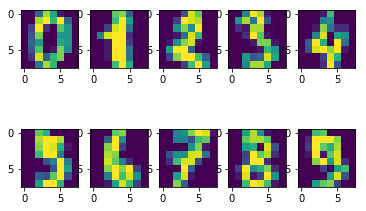

(8, 8)
[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


In [3]:
counter = 1
for i in range(0,10): #適当な範囲を指定
    plt.subplot(2,5,counter)
    counter += 1
    plt.imshow(digits.images[i])

if FLAG_fig: plt.savefig('fig_SVM_MClass_DHand_01.png')
plt.show()
# 画像データのフォーマットを見る
print(digits.images[0].shape) #適当な番号を指定
print(digits.images[100])     #同上

In [4]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# グリッドサーチ用パラメータを設定
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}

In [6]:
svm = SVC()
# グリッドサーチを実行
clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5) 
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0], 'decision_function_shape': ('ovo', 'ovr')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [7]:
# 最適パラメータを表示
print('Accuracy =', clf.best_score_)
print(clf.best_params_)

Accuracy = 0.9863945578231292
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'poly'}


In [9]:
y_test_pred = clf.predict( )
print("Accuracy Score = %f \n" % accuracy_score(y_test, y_test_pred))
print("Classification report for classifier \n %s"  % classification_report(y_test, y_test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [180, 1617]

下記で，dat = np.array([X_test[id]]) として，行っている理由は，scikit-learnのver 0.19から1次元配列を渡すのを禁止とされているため，見かけ上，2次元配列のように見せるためである。これを行わず，clf.predict(X_test[id])とすると，次の警告が表れる。
DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [ ]:
# idで指定したデータから推定した数字を見る
id=15
dat = np.array([X_test[id]])
print("Predicted Number is %d " % clf.predict(dat))
print("Real      Number is %d " % y_test[id])

plt.matshow(X_test[id].reshape(8,8))
if FLAG_fig: plt.savefig('fig_SVM_MClass_DHand_02.png')
plt.show()